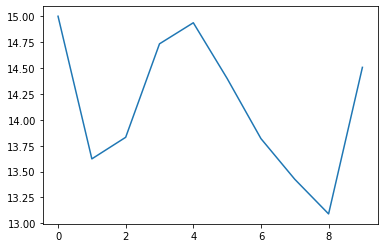

14.136976287109283


In [1]:
import numpy as np
k=0
k_l = []
while k < 10:
    N = 200
    rand_vector = np.random.randn(N)

    leng= 0
    for n in rand_vector:
        leng+=n*n

    k_l.append(np.sqrt(leng))
    k+=1

import matplotlib.pyplot as plt

plt.plot(k_l)
plt.show()
print(np.mean(k_l))

In [2]:
class Mutation:
    def __init__(self, xm, fit, zm):
        self.xm = xm
        self.zm = zm
        self.fit = fit

    def __gt__(self, mutation2):
        return self.fit > mutation2.fit

    def __str__(self):
        return "Mutation-Fitness: " + str(self.fit)

def sphere_function(value):
    return np.dot(value.T, value)


def rosenbrock_function(value):
    n = len(value)
    _sum = 0

    for i in range(n - 1):
        _sum += 100 * (value[i] ** 2 - value[i+1]) ** 2 + (value[i] - 1) ** 2
    return _sum


def rastrigin_function(value):
    A = 10
    n = len(value)
    _sum = 0

    for i in range(n):
        _sum += value[i] ** 2 - A * np.cos(2 * np.pi * value[i])
    return A * n + _sum

In [3]:
N = 5
x = 2 * np.ones(N)
generation = 1
_lambda = 20
sigma = 1.0
s_sigma = 0
c_sigma = np.sqrt(1 / (N + 1))
d = 1 + np.sqrt(1 / N)
population = []

# 100 Generations
while generation <= 100:

    # Create lambda offsprings per generation
    for o in range(1, _lambda):
        # Create and mutate offspring
        z = np.random.randn(N)
        x_ = x + sigma * z
        fitness = sphere_function(x_)
        mutation = Mutation(x_, fitness, z)
        population.append(mutation)

    # Select the 1 best candidate (x_, z) by sorting fitness
    population=sorted(population, key=lambda x: x.fit, reverse=False)
    #population.sort()
    population = population[0:1]
    x = population[0].xm
    z = population[0].zm

    # Calculate cumulative path length and new step size
    s_sigma = (1 - c_sigma) * s_sigma + c_sigma * z
    sigma = sigma * np.exp((c_sigma / d) * (((np.linalg.norm(s_sigma) ** 2) / N) - 1))

    print("The generation", generation, "is:", ", ".join([str(m) for m in population]), "Next sigma:", sigma)

    generation += 1

The generation 1 is: Mutation-Fitness: 12.030920922595357 Next sigma: 0.8248808218747926
The generation 2 is: Mutation-Fitness: 5.272316748333382 Next sigma: 0.6432029103631021
The generation 3 is: Mutation-Fitness: 1.747169768546263 Next sigma: 0.5184973687132556
The generation 4 is: Mutation-Fitness: 0.6953696420966058 Next sigma: 0.4381084755018614
The generation 5 is: Mutation-Fitness: 0.513297571040093 Next sigma: 0.35472606918136956
The generation 6 is: Mutation-Fitness: 0.513297571040093 Next sigma: 0.28802361383127617
The generation 7 is: Mutation-Fitness: 0.33648834677010975 Next sigma: 0.2284701541594978
The generation 8 is: Mutation-Fitness: 0.08637225611709816 Next sigma: 0.18569054359955753
The generation 9 is: Mutation-Fitness: 0.08407832241509 Next sigma: 0.15400399644170112
The generation 10 is: Mutation-Fitness: 0.017521191629461905 Next sigma: 0.11771651111788854
The generation 11 is: Mutation-Fitness: 0.017521191629461905 Next sigma: 0.0933881049804827
The generation

In [4]:
N = [2,5,10]
FUNC = [0,1,2]


{2: {2: None}, 5: {2: None}, 10: {2: None}}